C:\Users\celin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


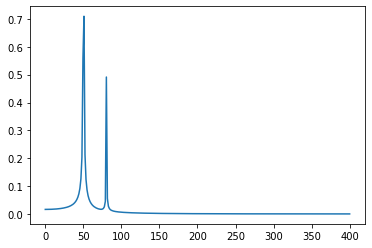

In [15]:
# Test scipy fft.

import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [16]:
# Perform FFT on single chunk of audio input. 

p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

N = CHUNK
T = 1.0 / 800.0

data = stream.read(CHUNK)
data_int = np.array(struct.unpack(str(2 * CHUNK) + 'B', data), dtype='b')[::2] #+ 128 
print(data_int)
#to make things wrap around
#get only every other entry bc for some reason, every other one goes to 0.

# x = np.arange(0, 2 * CHUNK, 2) # step size of 2
x = np.linspace(0.0, RATE, CHUNK)

# data_int is all integer values from 0 to 255 now NOT TRUE ANYMORE
data_int_f = scipy.fftpack.fft(data_int)

xf = np.linspace(0.0, 1.0/(2.0*T), CHUNK/2)

fig, ax = plt.subplots()
# plt.plot(data_int, np.abs(data_int_f))
ax.plot(xf, 2.0/CHUNK * np.abs(data_int_f[:CHUNK//2]))
plt.show()

# fig, ax = plt.subplots()

# ax.plot(data_int, '-')
# plt.show()

NameError: name 'FORMAT' is not defined

C:\Users\celin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


687.5


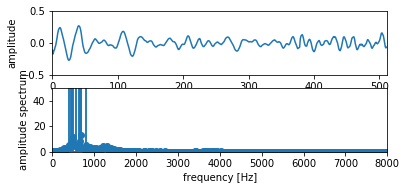

1156.25


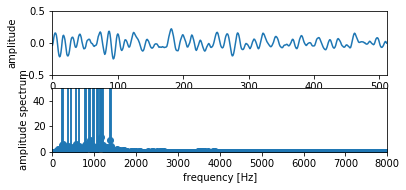

781.25


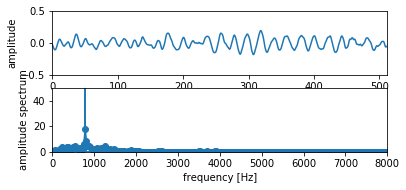

781.25


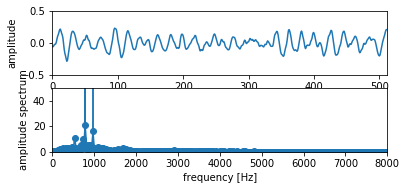

1000.0


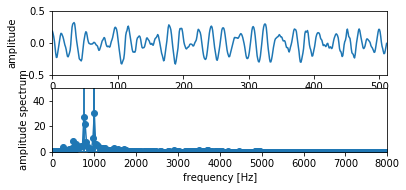

500.0


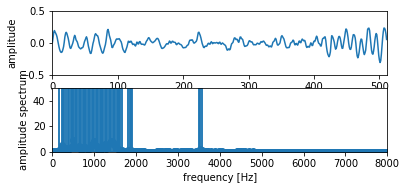

687.5


TypeError: close() missing 1 required positional argument: 'stream'

In [34]:
# https://gist.github.com/hyperconcerto/950bbb9d9d4014d893e5
# Display audio spectrum + fourir transform from computer microphone, in real time.

import numpy as np
import pyaudio

import matplotlib.pyplot as plt

class SpectrumAnalyzer:
    FORMAT = pyaudio.paFloat32
    CHANNELS = 1
    RATE = 16000
    CHUNK = 512
    START = 0
    N = 512

    wave_x = 0
    wave_y = 0
    spec_x = 0
    spec_y = 0
    data = []
    max_freq = 0
    max_val = 0
    to_keep = []

    def __init__(self):
        self.pa = pyaudio.PyAudio()
        self.stream = self.pa.open(format = self.FORMAT,
            channels = self.CHANNELS, 
            rate = self.RATE, 
            input = True,
            output = False,
            frames_per_buffer = self.CHUNK)
        # Main loop
        self.loop()

    def loop(self):
        try:
            while True :
                self.data = self.audioinput()
                self.fft()
                self.graphplot()

        except KeyboardInterrupt:
            self.pa.close()

        print("End...")

    def audioinput(self):
        ret = self.stream.read(self.CHUNK)
        ret = np.fromstring(ret, np.float32)
        return ret

    def fft(self):
        self.to_keep = []
        self.wave_x = range(self.START, self.START + self.N)
        self.wave_y = self.data[self.START:self.START + self.N]
        self.spec_x = np.fft.fftfreq(self.N, d = 1.0 / self.RATE)  
        y = np.fft.fft(self.data[self.START:self.START + self.N])    
        self.spec_y = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in y]
        self.max_freq = self.spec_x[self.spec_y.index(max(self.spec_y))]
        self.max_val = max(self.spec_y)
        for fq in self.spec_y:
            if fq > self.max_val - 8:
#                 print('include frequency ', self.spec_x[self.spec_y.index(fq)])
                self.to_keep.append(self.spec_x[self.spec_y.index(fq)])

    def graphplot(self):
        plt.clf()
        # wave
        plt.subplot(311)
        plt.plot(self.wave_x, self.wave_y)
        plt.axis([self.START, self.START + self.N, -0.5, 0.5])
        plt.xlabel("time [sample]")
        plt.ylabel("amplitude")
        #Spectrum
        plt.subplot(312)
        plt.plot(self.spec_x, self.spec_y, marker= 'o', linestyle='-')
        plt.axvline(x=self.max_freq)
        print(self.max_freq)
        for i in self.to_keep:
            plt.axvline(x=i)
        plt.axis([0, self.RATE / 2, 0, 50])
        plt.xlabel("frequency [Hz]")
        plt.ylabel("amplitude spectrum")
        #Pause
        plt.pause(.01)

if __name__ == "__main__":
    spec = SpectrumAnalyzer()

In [ ]:
import pyaudio
import struct
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.fftpack

# %matplotlib notebook
%matplotlib inline

CHUNK = 1024 * 4
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

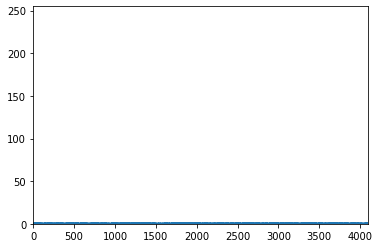

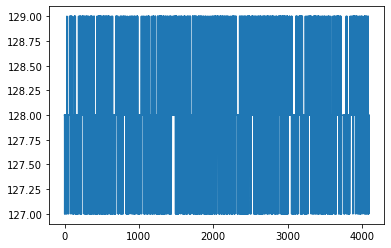

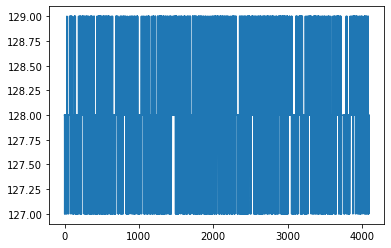

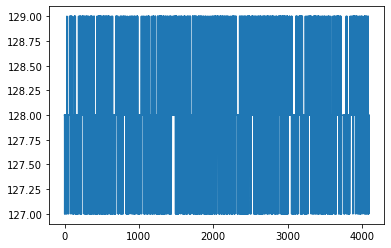

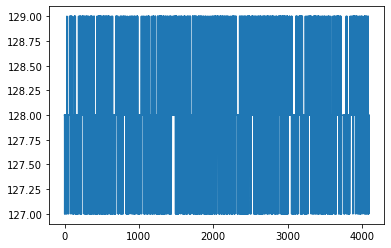

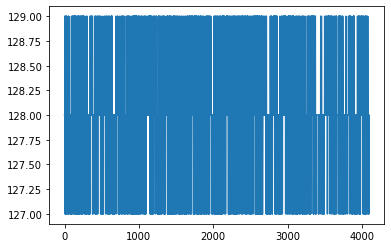

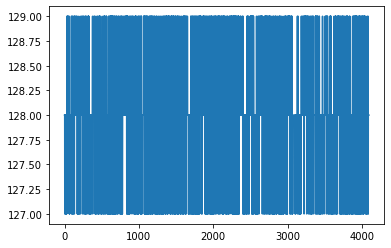

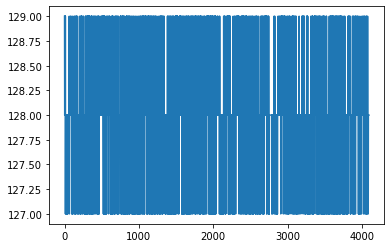

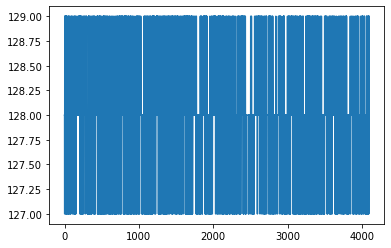

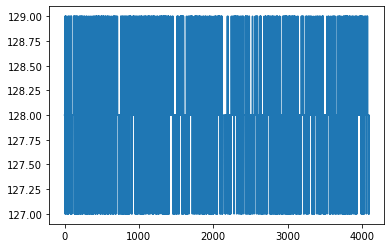

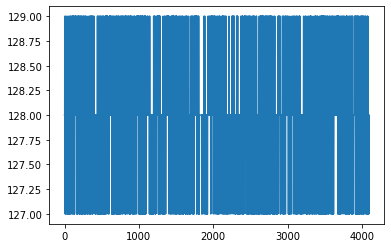

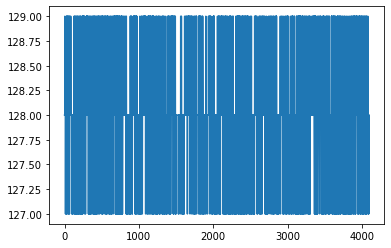

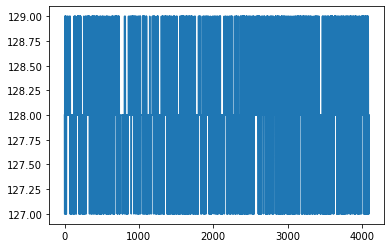

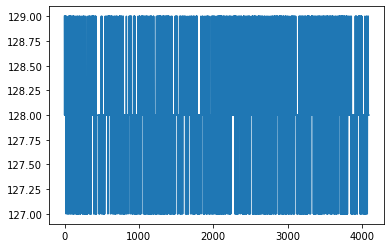

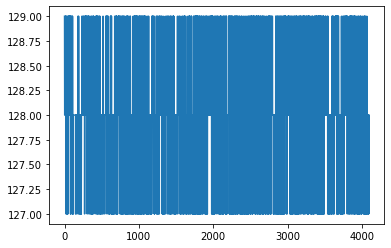

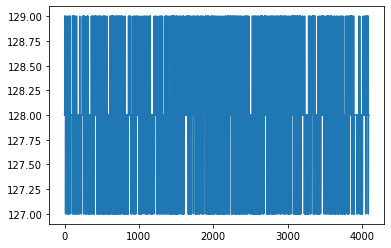

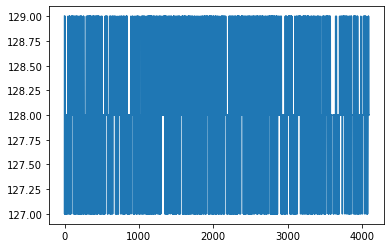

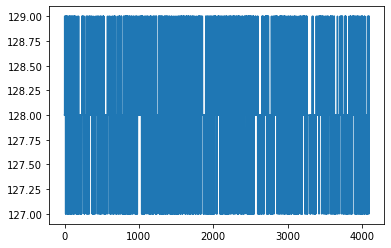

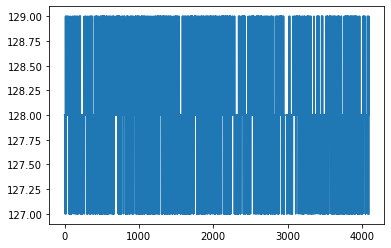

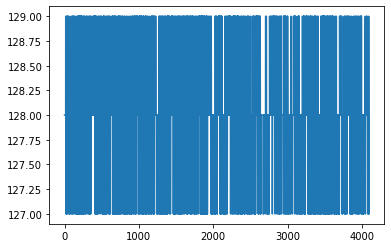

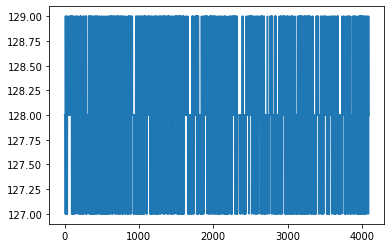

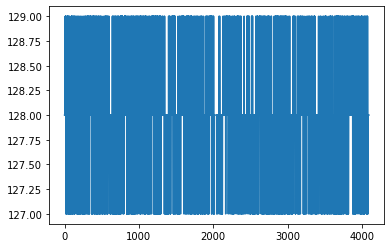

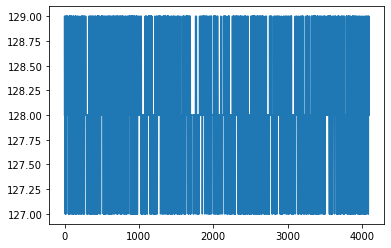

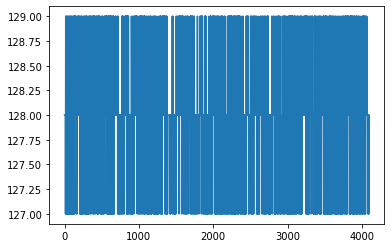

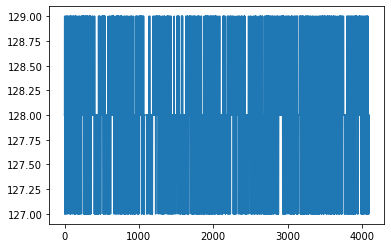

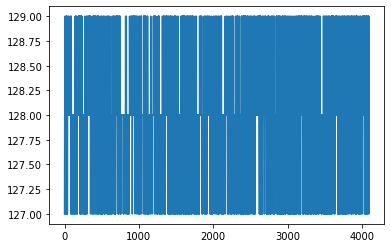

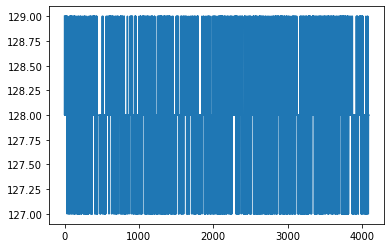

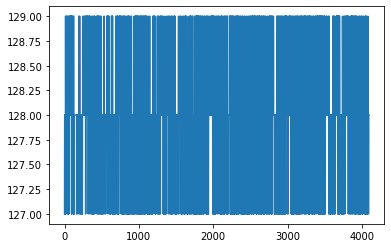

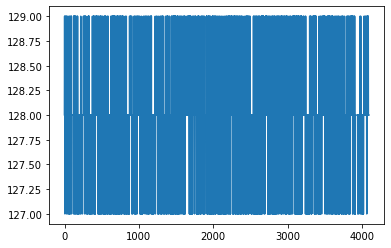

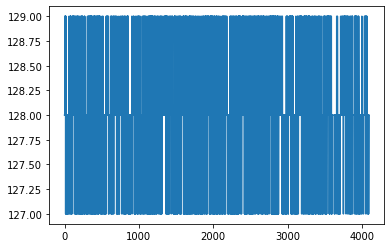

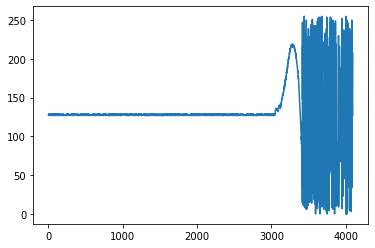

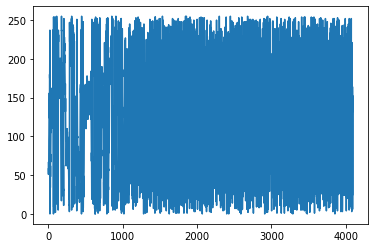

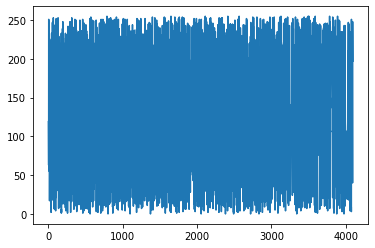

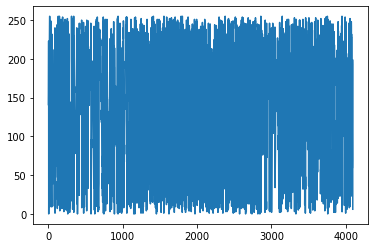

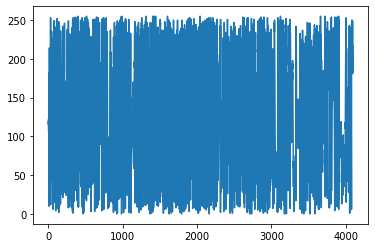

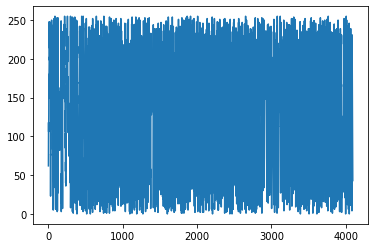

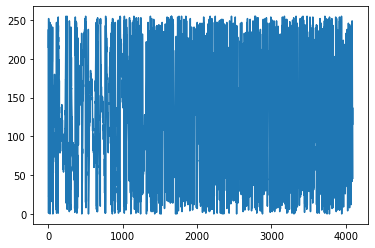

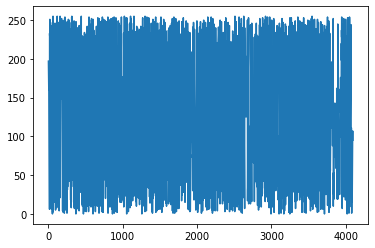

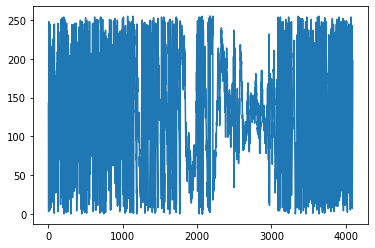

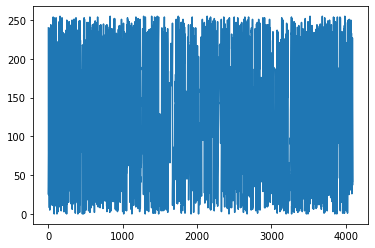

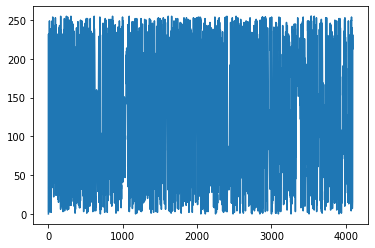

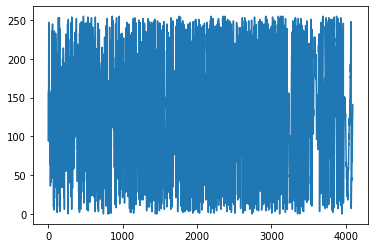

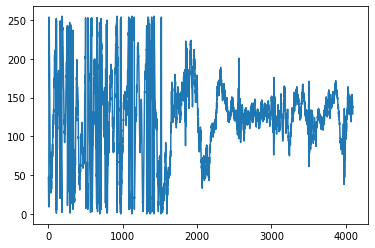

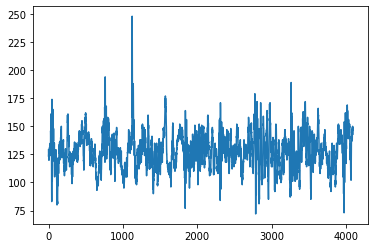

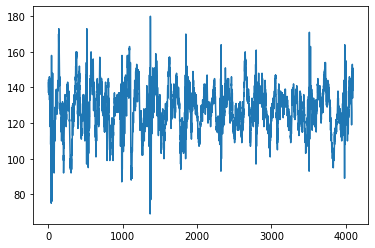

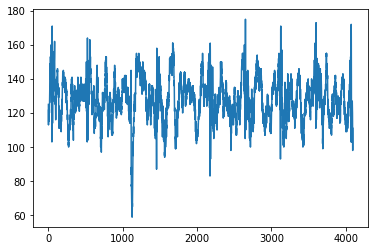

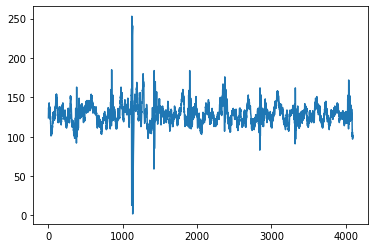

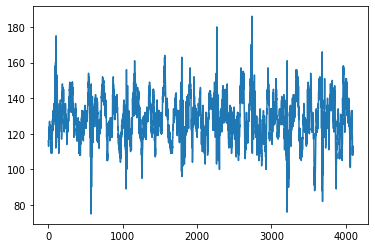

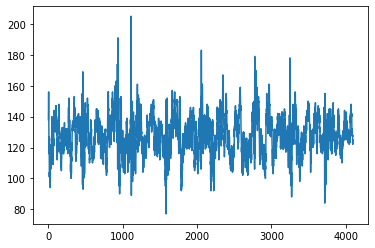

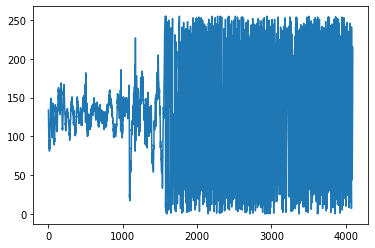

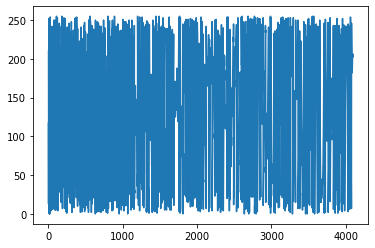

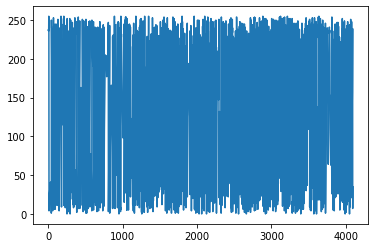

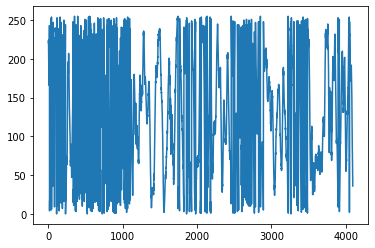

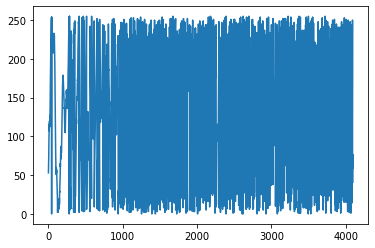

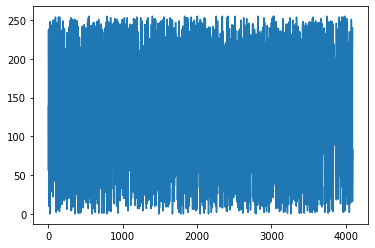

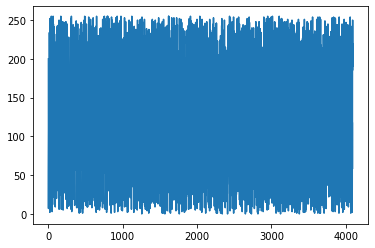

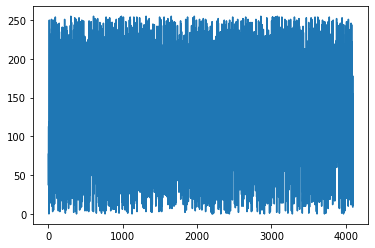

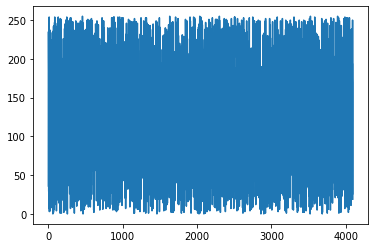

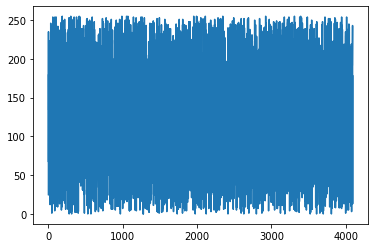

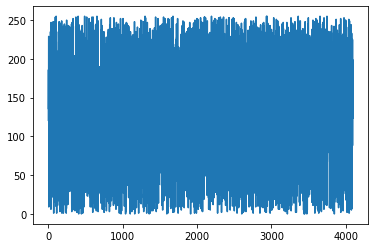

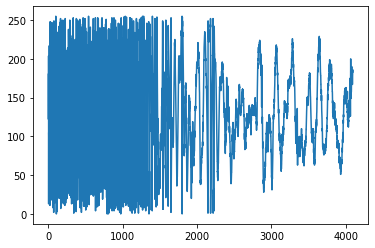

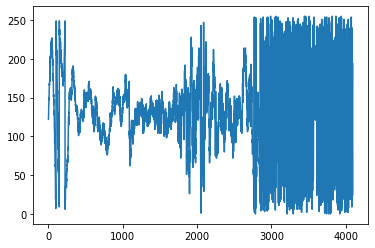

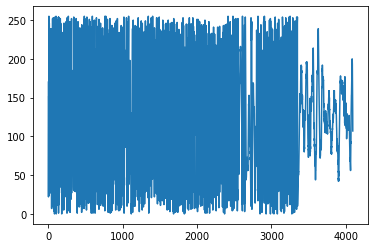

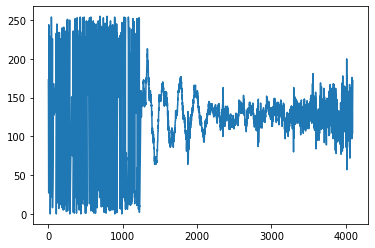

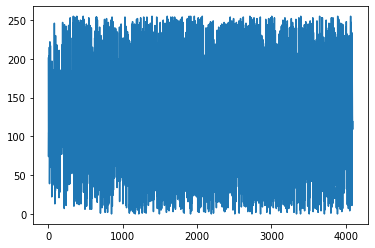

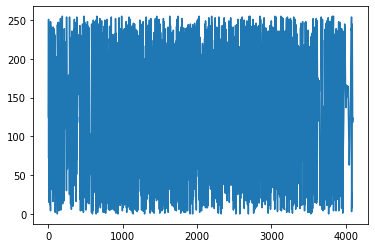

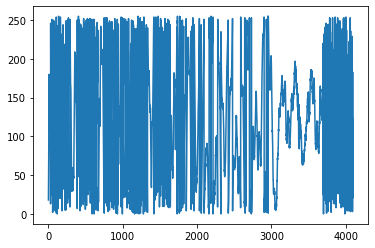

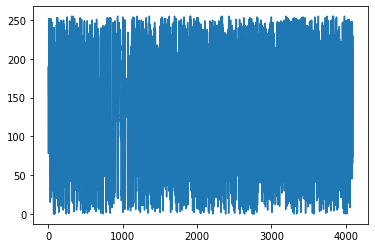

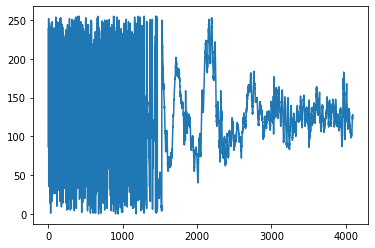

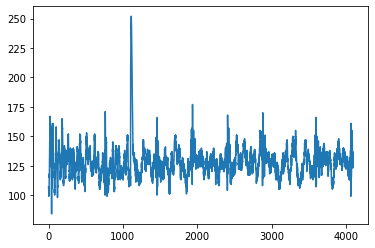

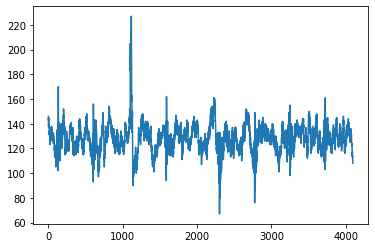

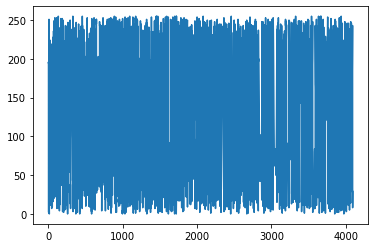

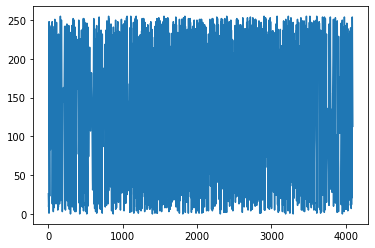

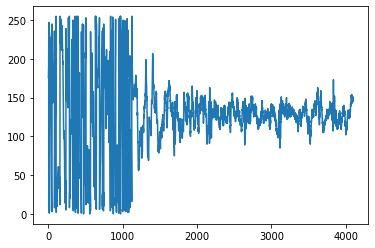

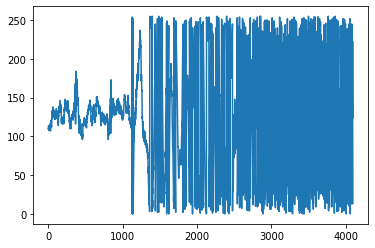

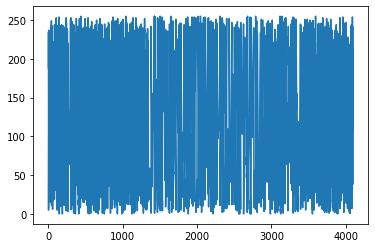

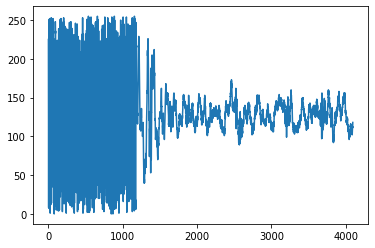

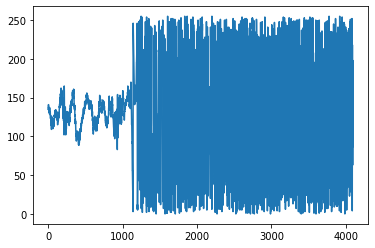

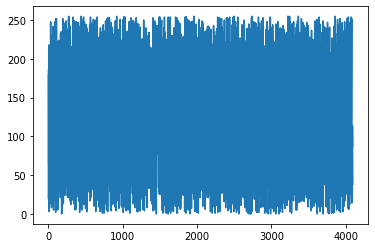

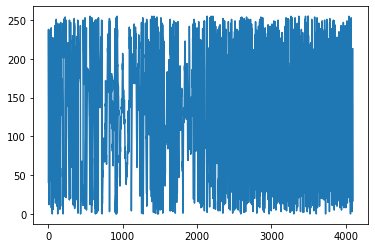

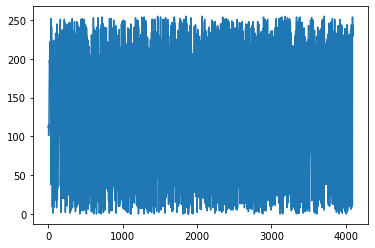

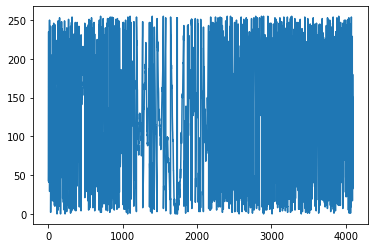

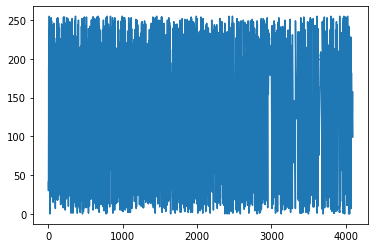

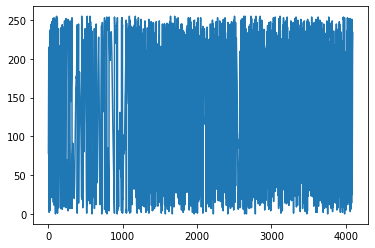

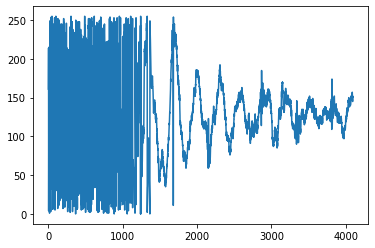

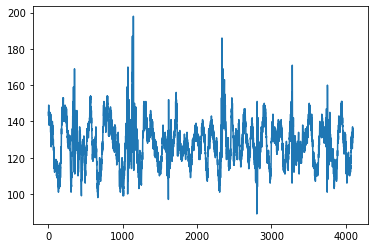

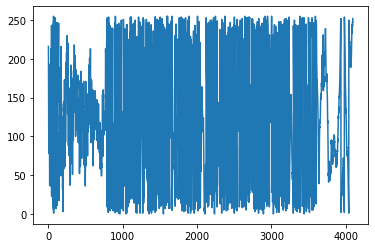

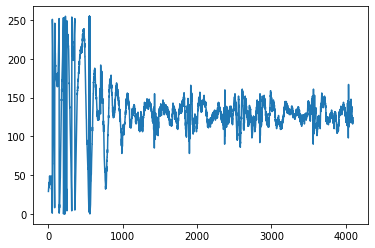

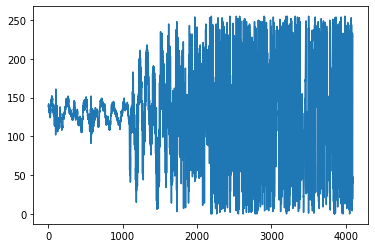

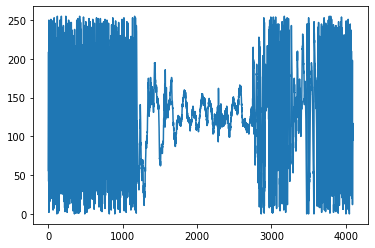

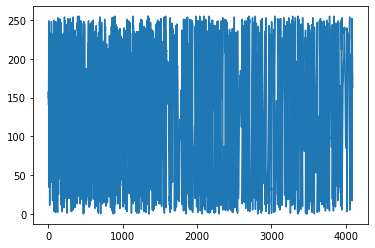

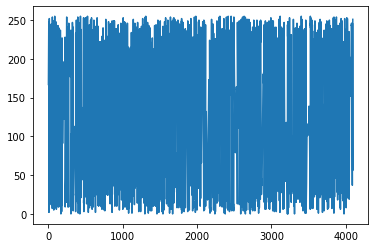

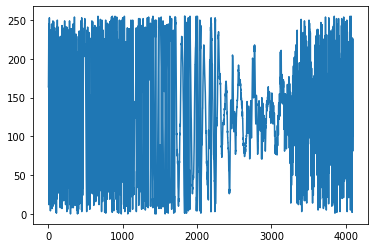

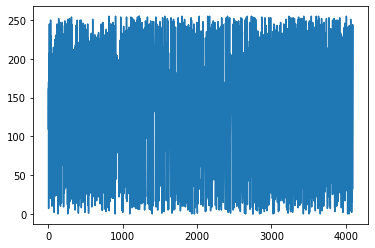

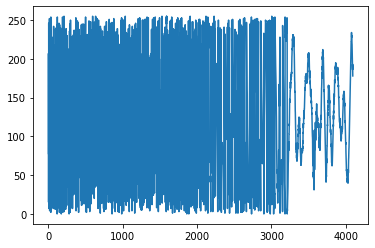

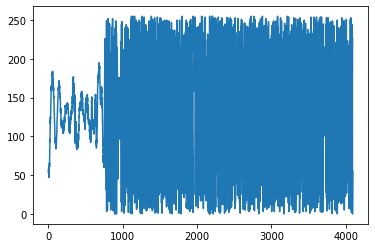

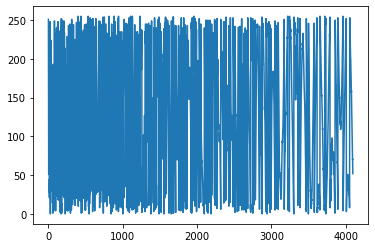

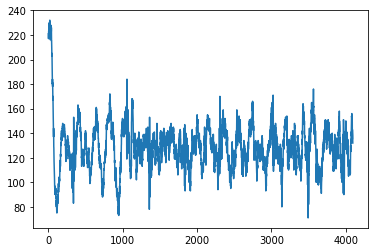

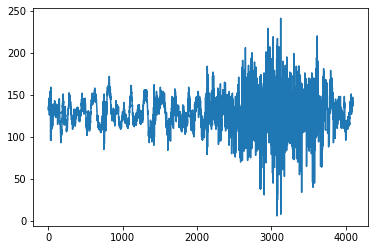

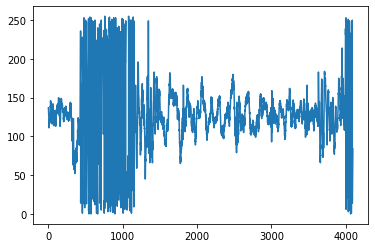

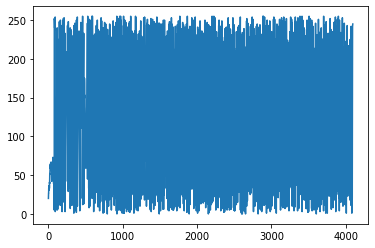

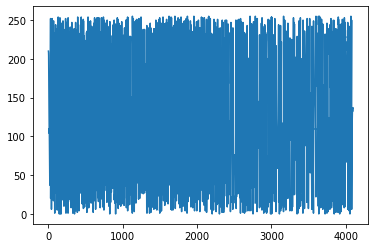

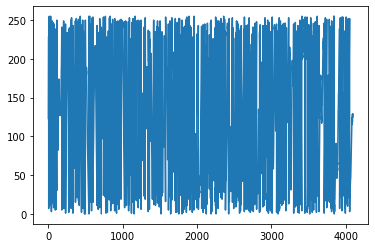

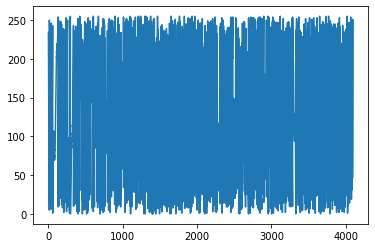

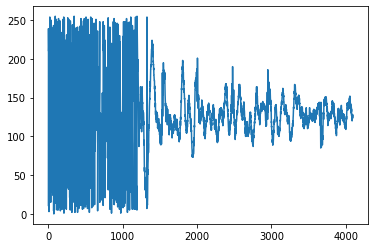

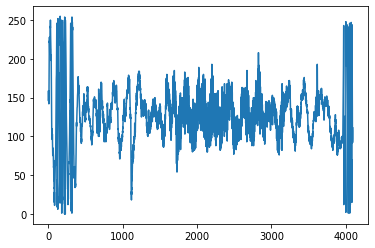

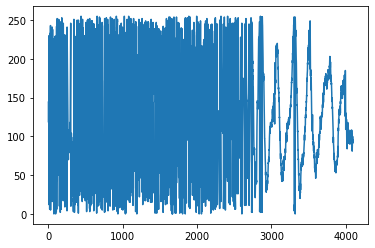

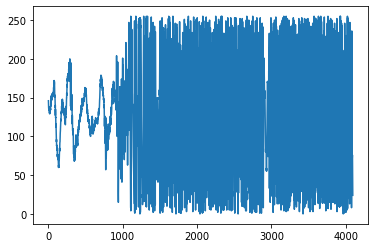

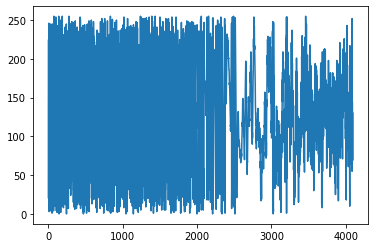

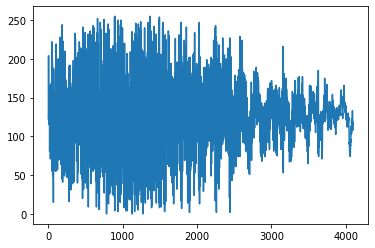

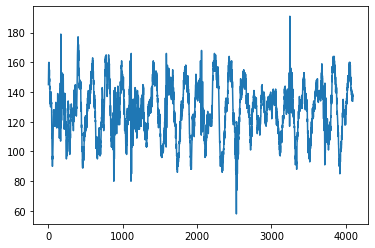

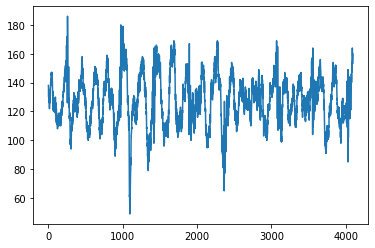

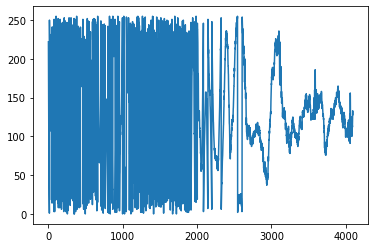

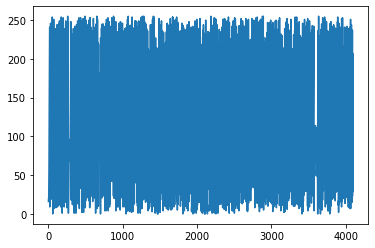

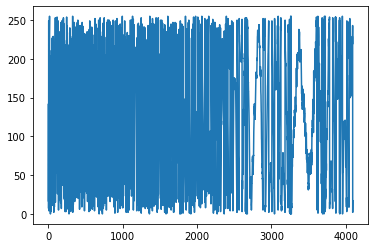

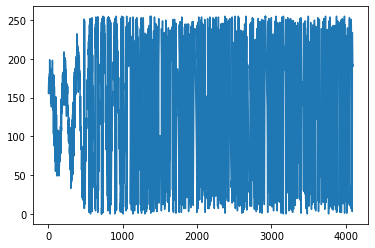

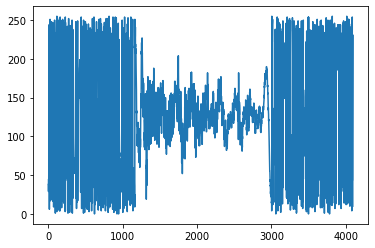

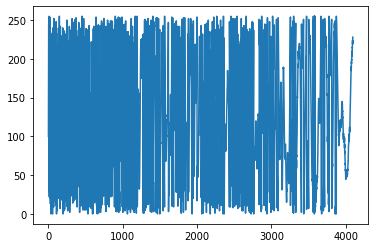

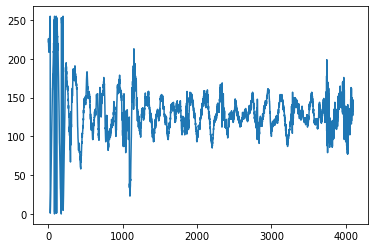

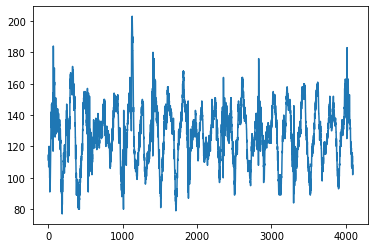

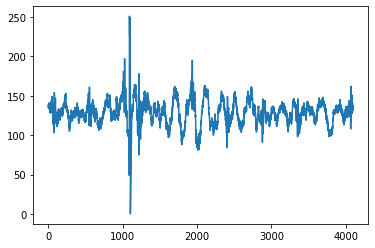

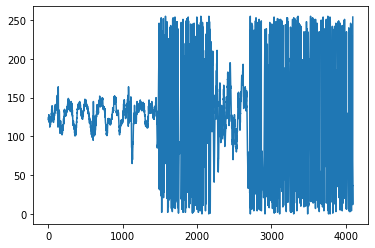

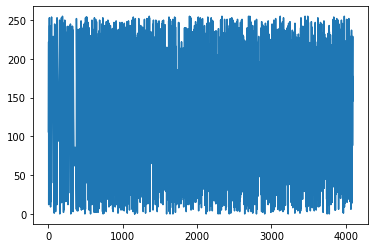

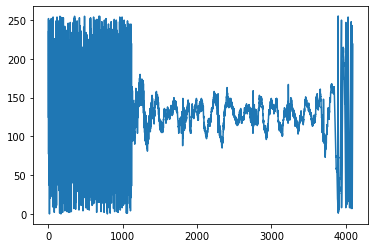

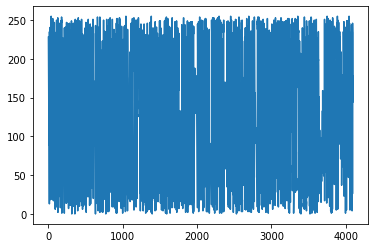

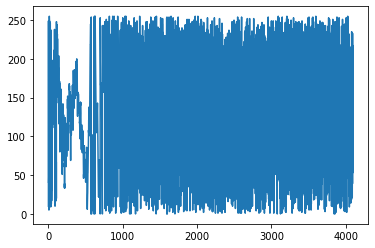

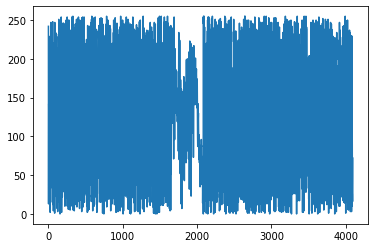

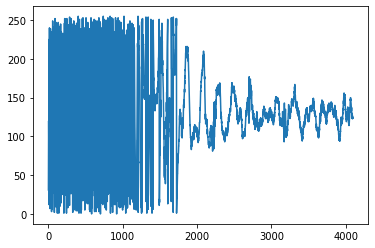

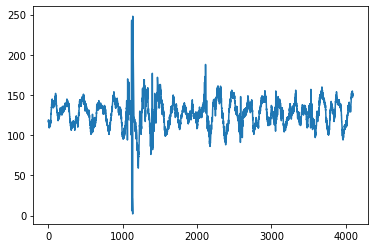

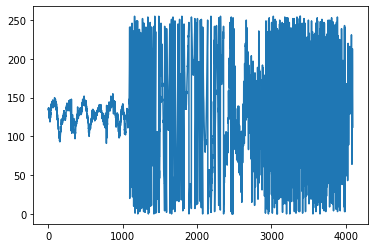

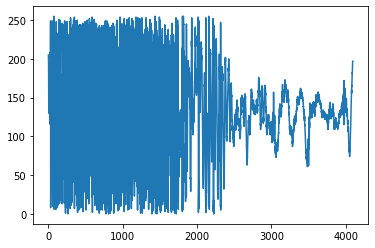

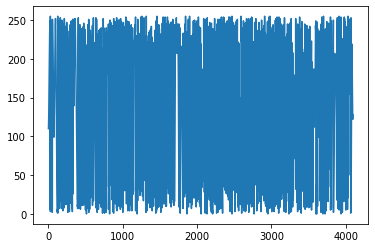

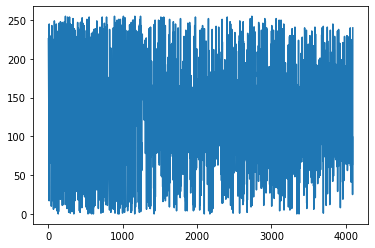

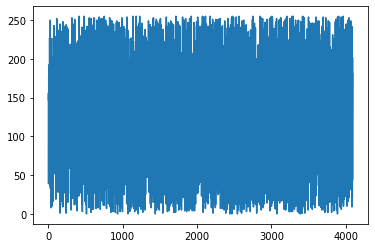

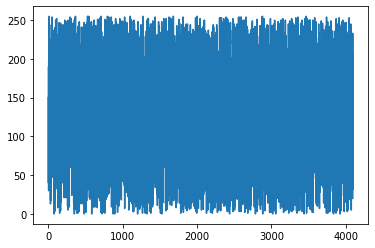

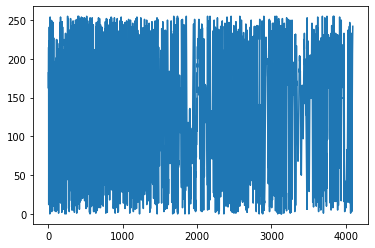

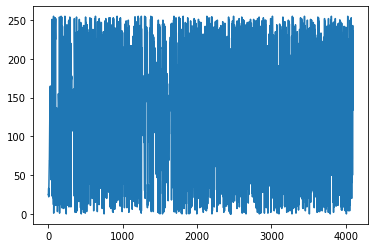

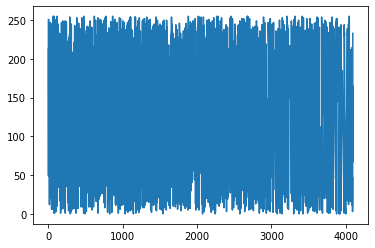

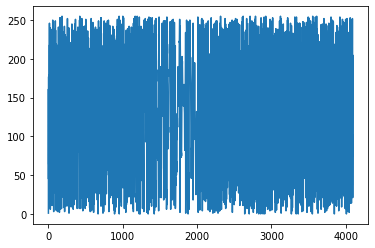

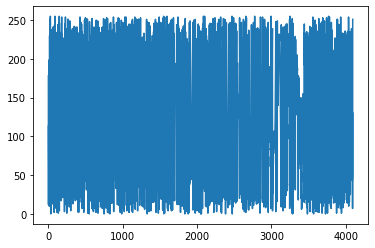

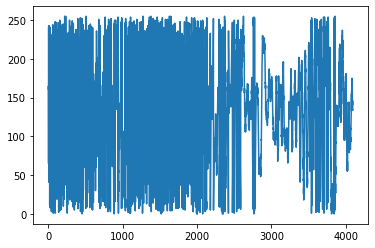

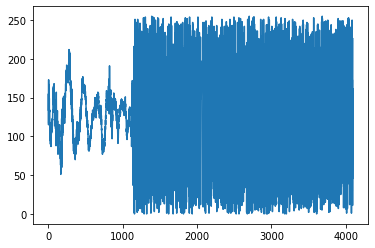

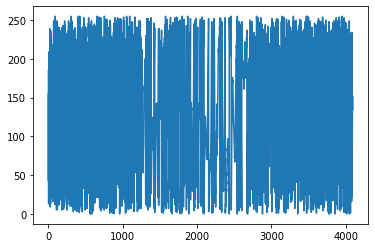

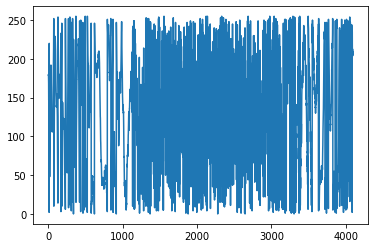

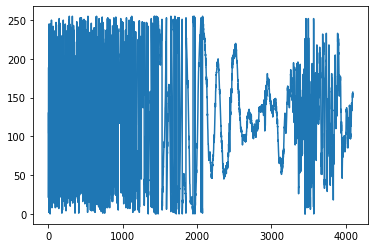

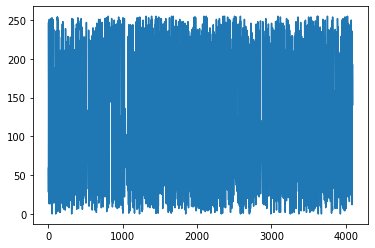

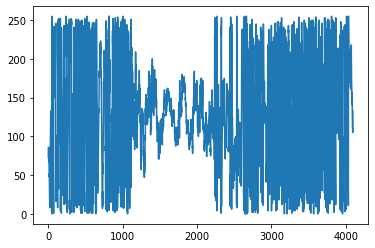

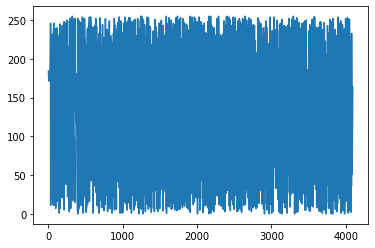

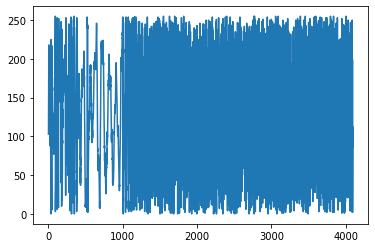

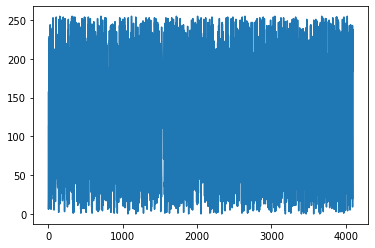

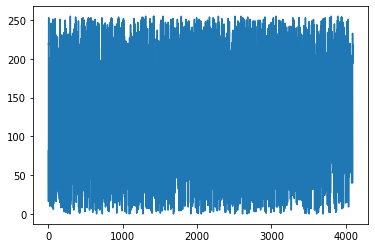

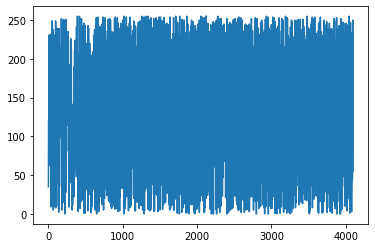

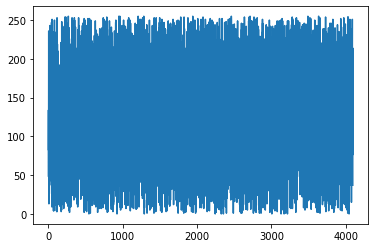

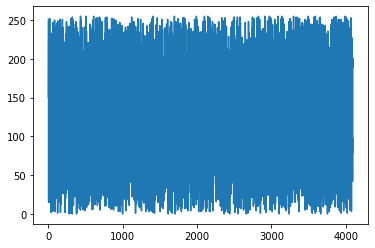

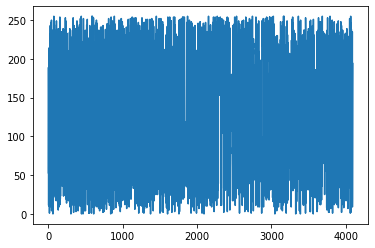

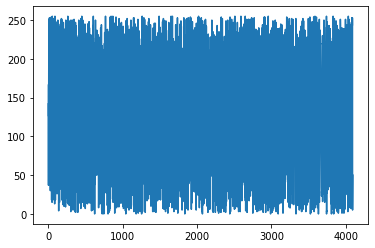

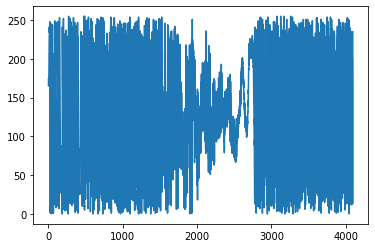

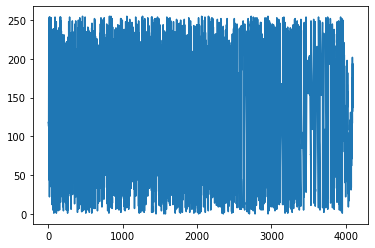

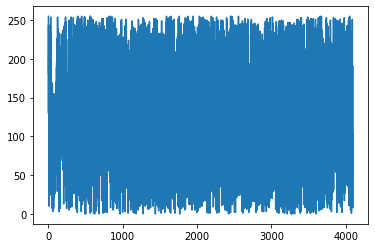

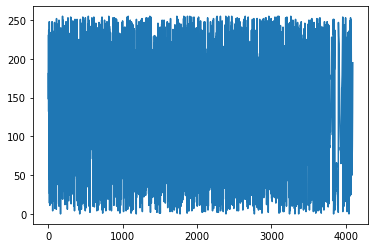

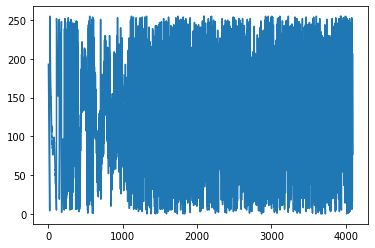

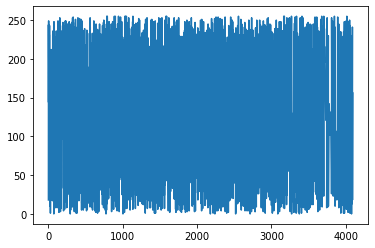

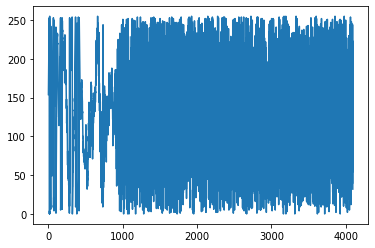

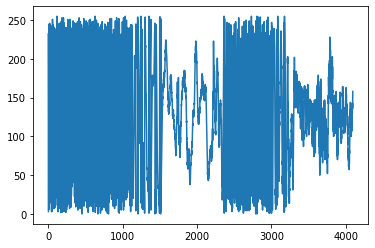

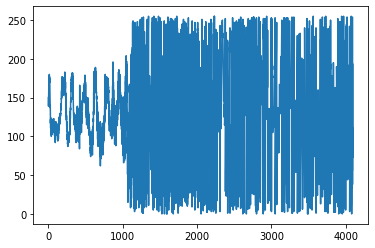

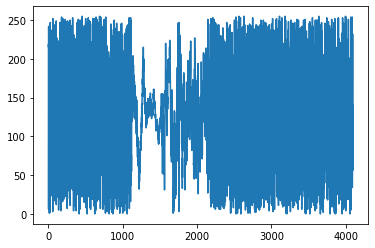

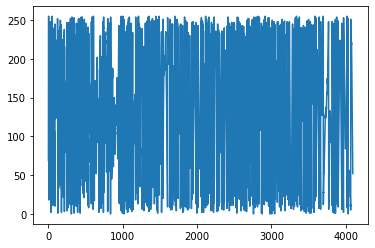

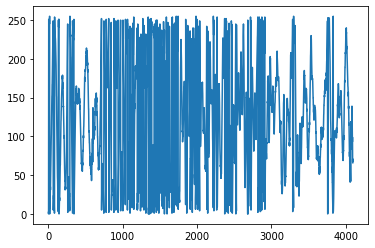

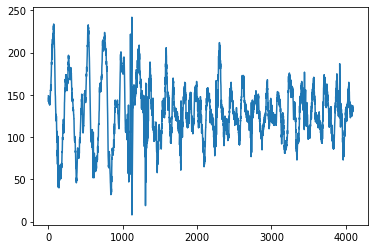

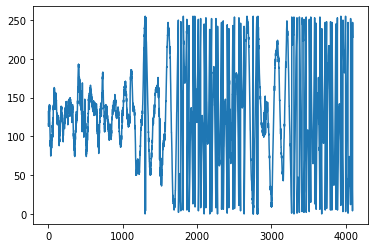

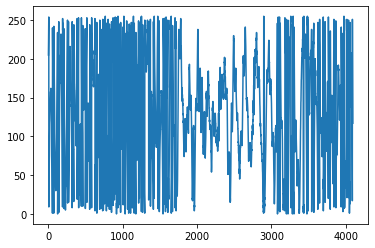

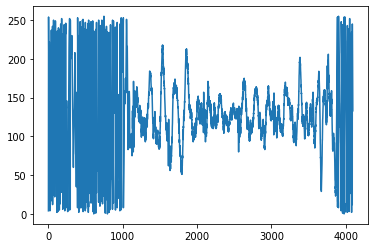

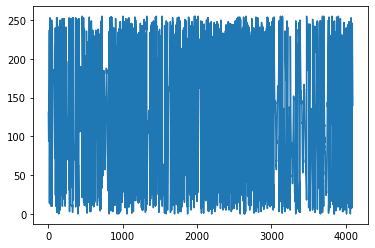

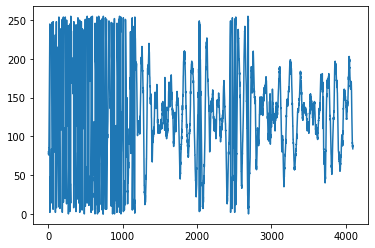

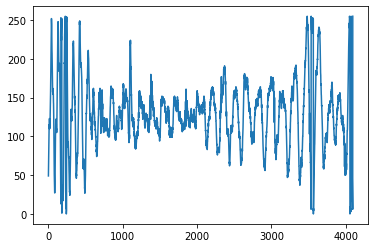

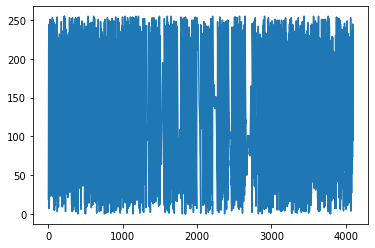

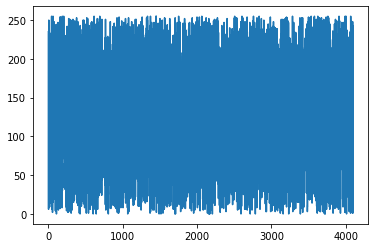

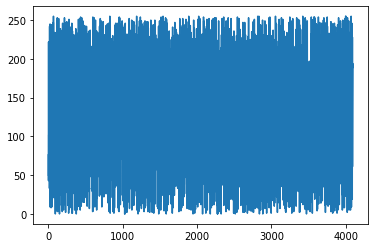

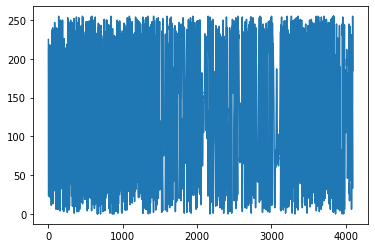

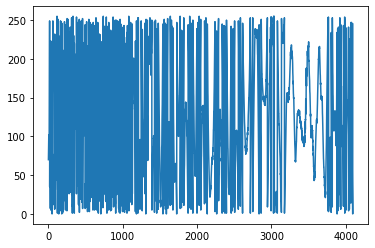

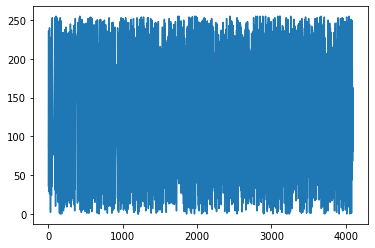

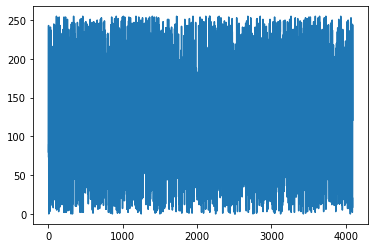

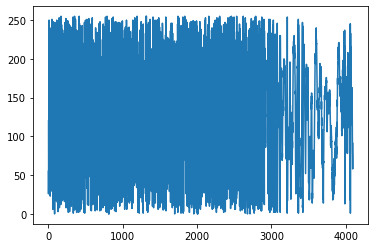

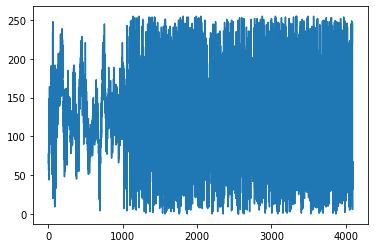

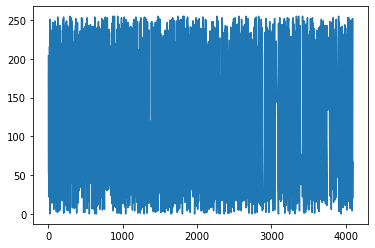

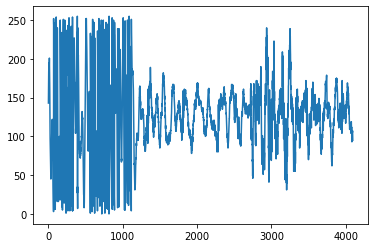

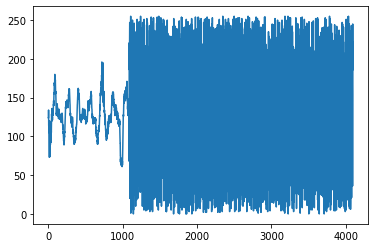

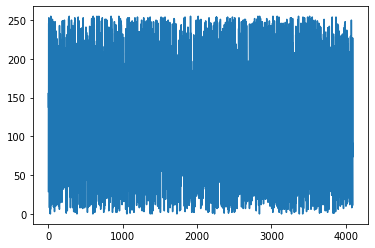

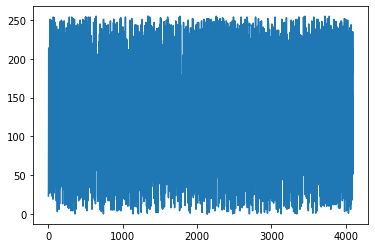

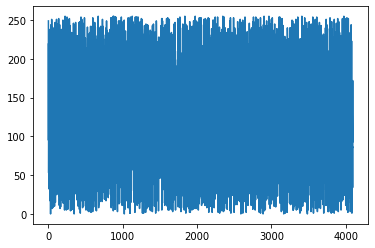

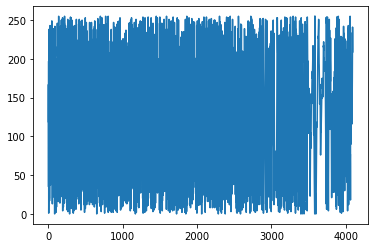

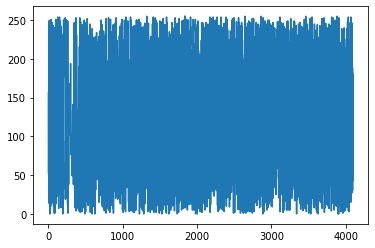

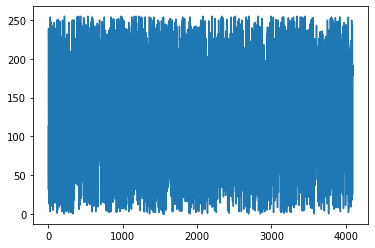

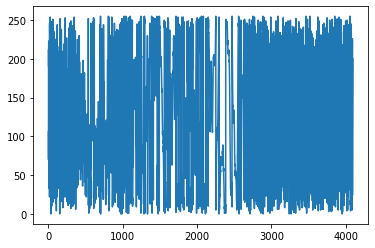

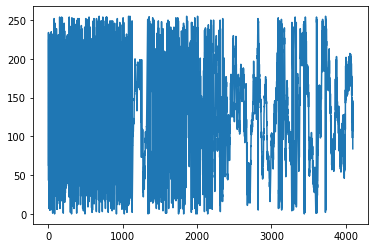

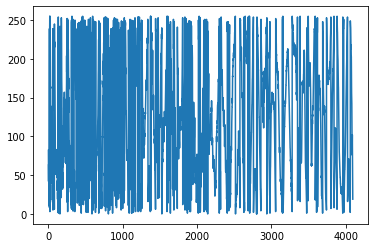

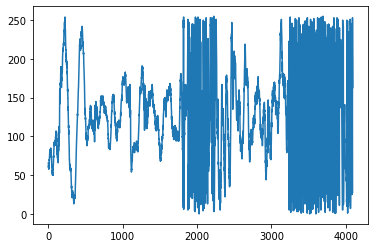

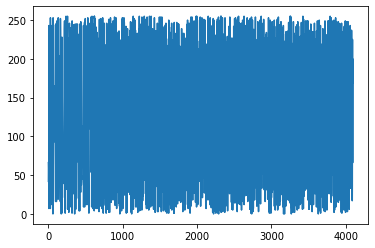

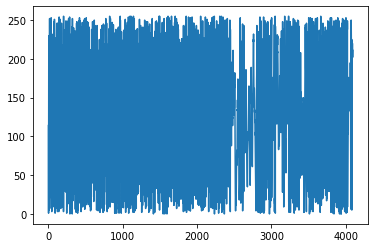

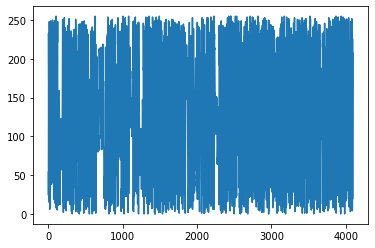

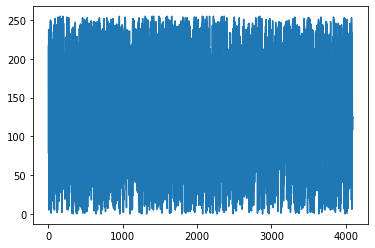

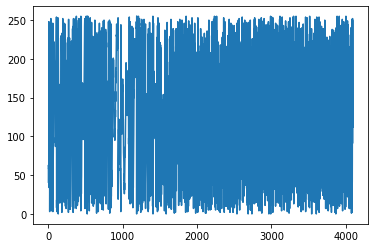

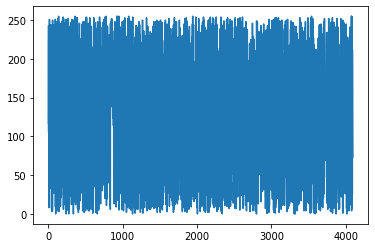

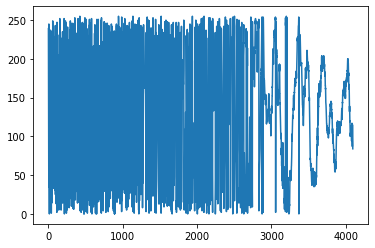

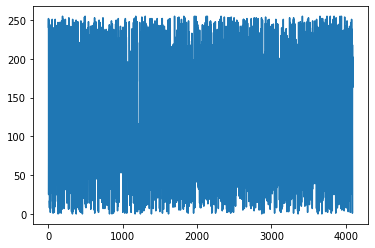

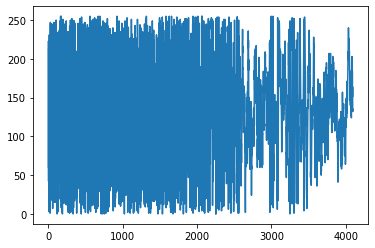

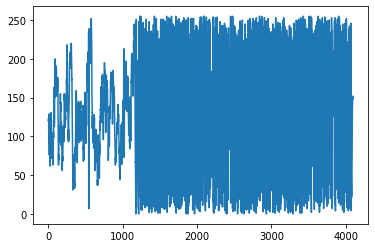

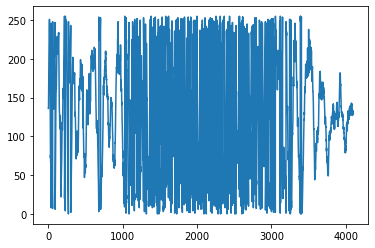

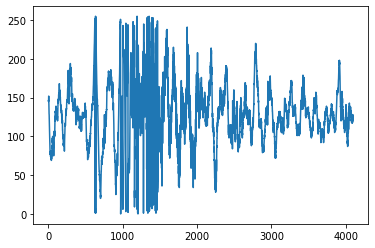

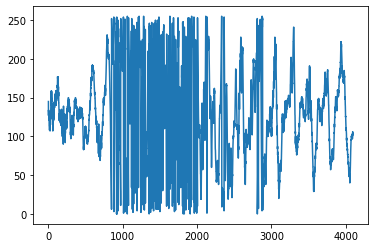

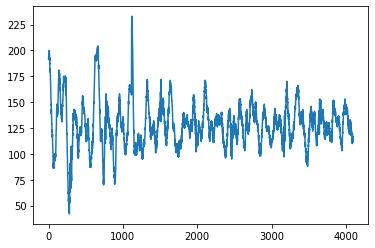

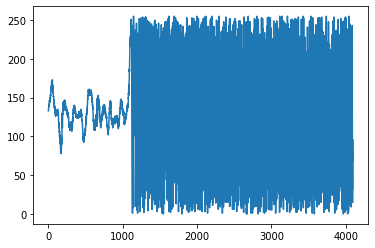

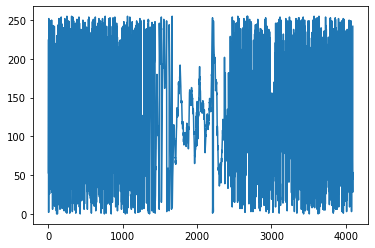

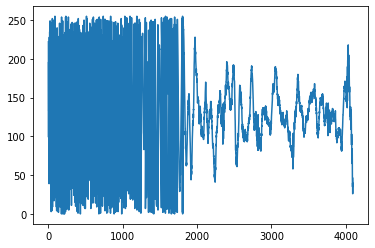

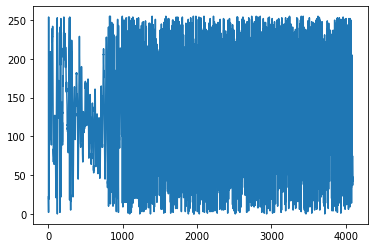

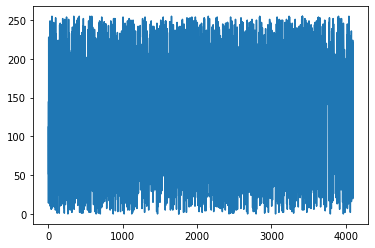

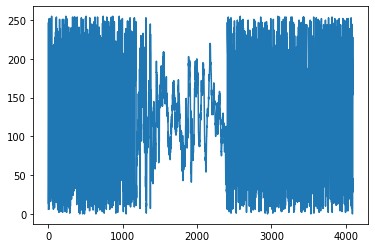

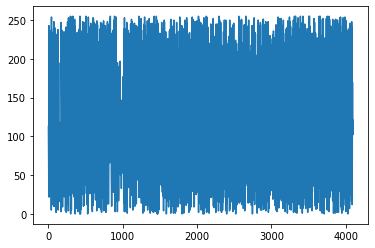

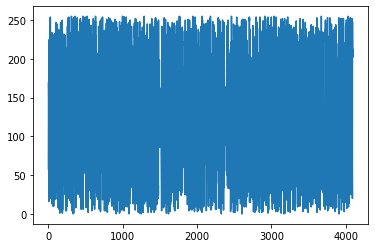

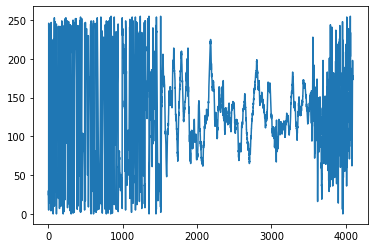

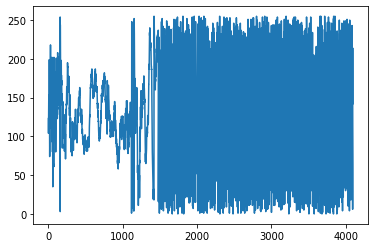

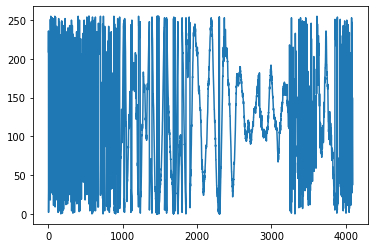

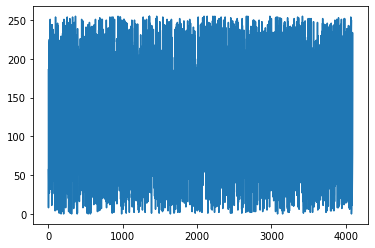

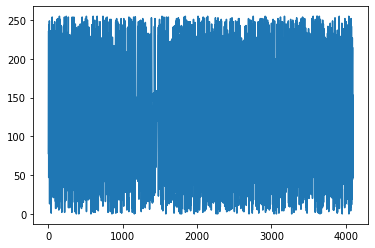

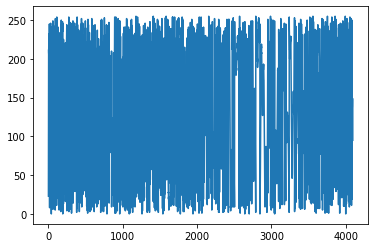

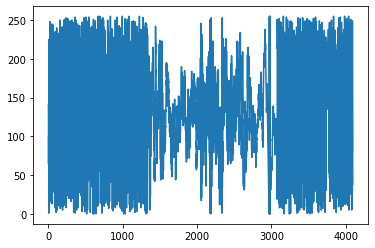

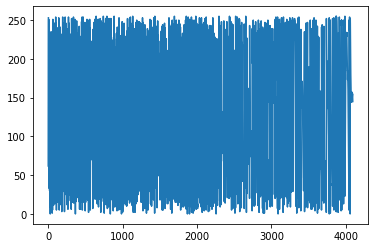

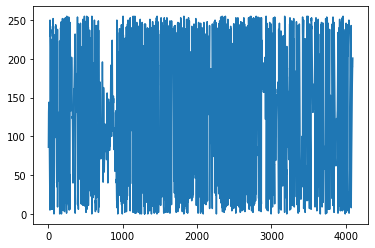

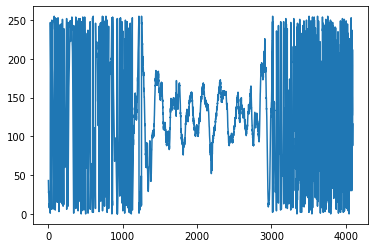

KeyboardInterrupt: 

In [52]:
# Display audio spectrum real-time, from computer microphone

p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)



fig, ax = plt.subplots()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.ion()

# fig.show()
# fig.canvas.draw()

x = np.arange(0, 2 * CHUNK, 2) # step size of 2
line, = ax.plot(x, np.random.rand(CHUNK)) #only chunk length long because slicing
ax.set_ylim(0, 255)
ax.set_xlim(0, CHUNK)
# fig.canvas.draw()

while True:
    data = stream.read(CHUNK)
    data_int = np.array(struct.unpack(str(2 * CHUNK) + 'B', data), dtype='b')[::2] + 128
    # data_int is all integer values from 0 to 255 now
    #to make things wrap around
    #get only every other entry bc for some reason, every other one goes to 0.
#     print(data_int)
#     ax.clear()
#     ax.plot(data_int)
#     fig.canvas.draw()

    fig, ax = plt.subplots()

    ax.plot(data_int, '-')
    plt.show()
#     line.set_ydata(data_int)
#     fig.canvas.draw()
#     fig.canvas.flush_events()
# #     time.sleep(1)
#     plt.draw()
# #     plt.draw()

# ax.plot(data_int, '-')
# plt.show()